In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm, binom, poisson, zscore, randint, t, chi2
import scipy.special
import numpy as np
import janitor
import matplotlib.pyplot as plt
import string

In [2]:
pd.set_option("display.max_columns", 100)

## Gastroenterology

### 6.1

In [3]:
random_str = "6964437198000289819571011"[:20]
assignment = list(map(lambda x: int(x) %  2, random_str))

### 6.2

In [4]:
sum(assignment)

9

Expected is 10/10

### 6.3

In [5]:
assignments = randint.rvs(0, 4, size=40)

In [6]:
np.unique(assignments, return_counts=True)

(array([0, 1, 2, 3]), array([11, 10, 12,  7], dtype=int64))

### 6.4

Expected is 10/10/10/10

## Pulmonary Disease

In [7]:
df = pd.DataFrame({'mean': [1.35, 0.92], 'sd': [0.5, 0.4], 'n': [40, 32]}, index=['normal', 'cal'])
df

,mean,sd,n
normal,1.35,0.5,40
cal,0.92,0.4,32


### 6.5

In [8]:
df['se'] = df['sd']/np.sqrt(df['n'])

In [9]:
df

,mean,sd,n,se
normal,1.35,0.5,40,0.079057
cal,0.92,0.4,32,0.070711


### 6.6

It means that estimate for mean has error of 0.079/0.071,

### 6.7

In [10]:
t.ppf(0.99, df=16)

2.583487185267472

#### 6.8

In [11]:
t.ppf(0.1, df=28)

-1.3125267841551713

#### 6.9

In [12]:
t.ppf(1-0.025, df=7)

2.3646242510102993

#### 6.10

In [13]:
chi2.ppf([0.025, 1-0.025], df=2)

array([0.05063562, 7.37775891])

#### 6.11

In [14]:
df = pd.read_csv('data/HOSPITAL.DAT.txt').clean_names().set_index('id')
df

,dur_stay,age,sex,temp,wbc,antibio,bact_cul,service
id,,,,,,,,
1,5,30,2,99.0,8,2,2,1
2,10,73,2,98.0,5,2,1,1
3,6,40,2,99.0,12,2,2,2
4,11,47,2,98.2,4,2,2,2
5,5,25,2,98.5,11,2,2,2
6,14,82,1,96.8,6,1,2,2
7,30,60,1,99.5,8,1,1,1
8,11,56,2,98.6,7,2,2,1
9,17,43,2,98.0,7,2,2,1


In [15]:
def calc_mean_ci(data, alpha=0.05):
    m = data.mean()
    s = data.std()
    n = data.shape[0]
    tstat = t.ppf([alpha/2, 1-alpha/2], df=n-1)
    ci_tsat = tstat*s/np.sqrt(n)
    return m, m+ci_tsat

In [16]:
calc_mean_ci(df.age, 0.05)

(41.24, array([32.94213525, 49.53786475]))

#### 6.12

In [17]:
calc_mean_ci(df.wbc, 0.05)

(7.84, array([6.51481211, 9.16518789]))

#### 6.13

In [18]:
calc_mean_ci(df.wbc, 0.1)

(7.84, array([6.74147691, 8.93852309]))

#### 6.14

95% CI are wider

#### 6.15

In [19]:
mens = df.sex == 1
p = mens.mean()
p

0.44

#### 6.16

In [20]:
n = df.shape[0]

In [21]:
se = np.sqrt(p*(1-p)/n)
se

0.09927738916792686

#### 6.17

In [22]:
norm.ppf([0.025, 0.975])*se+p

array([0.24541989, 0.63458011])

### Microbiology

In [23]:
df = pd.read_csv('data/zone_diameters.csv', index_col=0, header=[0,1])
df

Ecoli          Saureus        Paeruginosa       
  Different Common Different Common   Different Common
A      27.5   23.8      25.4   23.9        20.1   16.7
B      24.6   21.1      24.8   24.2        18.4   17.0
C      25.3   25.4      24.6   25.0        16.8   17.1
D      28.7   25.4      29.8   26.7        21.7   18.2
E      23.0   24.8      27.5   25.3        20.1   16.7
F      26.8   25.7      28.1   25.2        20.3   19.2
G      24.7   26.8      31.2   27.1        22.8   18.8
H      24.3   26.2      24.3   26.5        19.9   18.1
I      24.9   26.3      25.4   25.1        19.3   19.2

### 6.18

In [24]:
df.xs('Different', axis=1, level=1).apply(calc_mean_ci, axis=0)

,Ecoli,Saureus,Paeruginosa
0,25.533333,26.788889,19.933333
1,"[24.162063149128905, 26.90460351753776]","[24.875907285576417, 28.70187049220136]","[18.599190416586246, 21.267476250080428]"


#### 6.19

In [25]:
df.xs('Common', axis=1, level=1).apply(calc_mean_ci, axis=0)

,Ecoli,Saureus,Paeruginosa
0,25.055556,25.444444,17.888889
1,"[23.728566933090484, 26.38254417802063]","[24.59532618852811, 26.293562700360777]","[17.089654812337503, 18.68812296544027]"


#### 6.20

In [26]:
def calc_std_ci(data, alpha=0.05):
    s = data.std(ddof=1)
    n = data.shape[0]
    ci = chi2.ppf([1-alpha/2, alpha/2], df=n-1)
    return s, np.sqrt((n-1)*s**2/ci)

In [27]:
calc_std_ci(df.iloc[:,0])

(1.783956277491127, array([1.20498582, 3.41765149]))

In [28]:
df.xs('Different', axis=1, level=1).apply(calc_std_ci)

,Ecoli,Saureus,Paeruginosa
0,1.783956,2.488697,1.735655
1,"[1.2049858166955643, 3.417651492860459]","[1.6810076716780882, 4.767772615262228]","[1.1723607139156127, 3.325118261617624]"


#### 6.21

In [29]:
df.xs('Common', axis=1, level=1).apply(calc_std_ci)

,Ecoli,Saureus,Paeruginosa
0,1.726348,1.104662,1.039765
1,"[1.1660739709836934, 3.3072874323507495]","[0.7461516095532089, 2.1162789859907782]","[0.7023165365641925, 1.9919513793377874]"


#### 6.22

Common has less variability

## Renal disease

In [30]:
def calc_mean_ci2(m, s, n, alpha=0.05):
    tstat = t.ppf([alpha/2, 1-alpha/2], df=n-1)
    ci_tsat = tstat*s/np.sqrt(n)
    return m, m+ci_tsat

In [31]:
# phosphate baseline
calc_mean_ci2(1.68, 0.47, 102)

(1.68, array([1.58768324, 1.77231676]))

In [32]:
# phosphate followup
calc_mean_ci2(1.00, 0.19, 69)

(1.0, array([0.95435702, 1.04564298]))

In [33]:
# potassium baseline
calc_mean_ci2(4.42, 0.64, 102)

(4.42, array([4.29429207, 4.54570793]))

In [34]:
# potassium followup
calc_mean_ci2(4.49, 0.71, 69)

(4.49, array([4.31943938, 4.66056062]))

In [35]:
# phosphate baseline
calc_mean_ci2(1.68, 0.47, 102)

(1.68, array([1.58768324, 1.77231676]))

In [36]:
# phosphate followup
calc_mean_ci2(1.57, 0.4, 69)

(1.57, array([1.47390951, 1.66609049]))

In [37]:
# PAIS baseline
calc_mean_ci2(36.50, 16.08, 102)

(36.5, array([33.3415883, 39.6584117]))

In [38]:
# PAIS followup
calc_mean_ci2(23.27, 13.79, 69)

(23.27, array([19.95728029, 26.58271971]))

#### 6.24

Creatinine and potassium cannot be rejected on 5% level. Phosphate is lower in followup at 5% significance, similarly as PAIS.

## Opthalmology, Hypertension

In [39]:
n = 200
m = 140
s = 25

#### 6.25

In [40]:
calc_mean_ci2(m, s, n, 0.05)

(140, array([136.51404039, 143.48595961]))

#### 6.26

Yes, 130 is below 95% CI

## Sexually Transmitted Disease

In [41]:
n = 46
k = 6

#### 6.27

In [42]:
p = k/n
p

0.13043478260869565

#### 6.28

In [43]:
# test for normal approximation
n*p*(1-p)
# could be used

5.217391304347826

In [44]:
def binomial_ci_napp(n, k, alpha=0.05):
    p = k/n
    if n*p*(1-p) < 5:
        print('Normal approximation should not be used')
        print(n*p*(1-p))
    se = np.sqrt(p*(1-p)/n)

    return p, norm.ppf([alpha/2, 1-alpha/2])*se+p

In [45]:
binomial_ci_napp(n, k, 0.05)

(0.13043478260869565, array([0.03311145, 0.22775811]))

#### 6.29

Boths drugs have similar effects

## Pharmacology

In [46]:
n = 25
m = 7
s = 2

#### 6.30

In [47]:
calc_mean_ci2(m, s, n, 0.05)

(7, array([6.17444058, 7.82555942]))

#### 6.31

In [48]:
def calc_std_ci2(s, n, alpha=0.05):
    ci = chi2.ppf([1-alpha/2, alpha/2], df=n-1)
    return s, np.sqrt((n-1)*s**2/ci)

In [49]:
_, std_ci = calc_std_ci2(s, n, 0.01)
std_ci**2

array([2.10718033, 9.71047265])

#### 6.32

In [50]:
_, ci = calc_mean_ci2(m, s, 249, 0.05)
ci[1]-ci[0]

0.4992671419779837

## Environmental health

In [51]:
n = 525
k = 7

#### 6.33

In [52]:
lam = k/n
lam

0.013333333333333334

#### 6.34

In [53]:
def calc_possion_ci(k, alpha=0.05):
    import scipy.optimize
    lower_err = lambda a: np.abs(1-poisson.cdf(k-1, a) - alpha/2)
    upper_err = lambda a: np.abs(poisson.cdf(k, a) - alpha/2)
    low = scipy.optimize.minimize(lower_err, k, method='Nelder-Mead').x[0]
    upp = scipy.optimize.minimize(upper_err, k, method='Nelder-Mead').x[0]
    return k, np.array([low, upp])

In [54]:
best, ci = calc_possion_ci(k)

In [55]:
ci/n

array([0.00536068, 0.02747184])

#### 6.35

In [56]:
expectedIncidence = 402.8/100000
expectedIncidence

0.004028

Expected incidence rate is outside 95% confidence interval.

## Obstetrics, Serology

#### 6.36

In [57]:
data = np.power(2, [4, 3, 5, 4, 5, 4, 3, 4, 4, 5])
data_log = np.log2(data)
n = len(data_log)

In [58]:
s, s_ci = calc_std_ci(data_log)

In [59]:
s**2

0.5444444444444444

#### 6.37

In [60]:
s_ci ** 2

array([0.25758607, 1.81455305])

#### 6.38

In [61]:
diff = 1.5
norm.cdf(diff/s)-norm.cdf(-diff/s)

0.9579366435148755

#### 6.39

In [62]:
diff = 2.5
norm.cdf(diff/s)-norm.cdf(-diff/s)

0.9992963541848667

## Hypertension

In [63]:
n = 100
n_eff = 20

#### 6.40

In [64]:
p_eff = n_eff/n
p_eff

0.2

#### 6.41

?

#### 6.42

?

#### 6.43

In [65]:
sample_mean = 5.3
sample_var = 144
sample_std = np.sqrt(sample_var)

In [66]:
se = sample_std/np.sqrt(n)
se

1.2

#### 6.44

In [67]:
calc_mean_ci2(sample_mean, sample_std, 100)

(5.3, array([2.91893966, 7.68106034]))

#### 6.45

This drug is not effective as population means is < 10mmHg at 95% CI

####  6.46

## Simulation

In [68]:
df = pd.read_excel('data/BIRTHWEIGHT.DAT.xlsx', index_col=0)

#### 6.47

In [69]:
data = np.random.choice(df.values.ravel(), size=(5,6))

In [70]:
means = data.mean(axis=0)
means

array([110. , 131.4, 115.6,  93. , 115.6, 118.2])

#### 6.48

In [71]:
se = means.std()
se

11.420108970096955

#### 6.49

In [72]:
data[2,:].std()

38.073029240599645

#### 6.50

#### 6.51

## Obstetrics

In [73]:
mean = 112
sd = 20.6
n = 5

#### 6.52

In [74]:
se = sd/np.sqrt(n)

In [75]:
d = 8 # 0.5 lb == 8oz
ci = norm.cdf([mean-d, mean+d], mean, se)
ci[1]-ci[0]

0.6148114237246243

#### 6.53

In [76]:
d = 16
ci = norm.cdf([mean-d, mean+d], mean, se)
ci[1]-ci[0]

0.917569014620842

#### 6.54

In [77]:
obs_8 = 5+8+12.5+8.5+6.5+5+7+9+8 # 104-120
obs_8/100

0.695

In [78]:
obs_16 = 1.5+1.5+3.5+4.5+obs_8+4+6+3+2.5 # 96-128
obs_16/100

0.96

## Hypertension, Pediatrics

In [79]:
df = pd.read_csv('data/INFANTBP.DAT.txt').clean_names().set_index('id')
df

,mn_sbp,mn_dbp,msb1slt,msb2slt,msb3slt,msb4slt,msb5slt,msb6slt,msb7slt,msb8slt,msb9slt,msb10slt,msb1sug,msb2sug,msb3sug,msb4sug,msb5sug
id,,,,,,,,,,,,,,,,,
1,75.33,42.67,5.0,5.66,0.00,4.33,4.5,3.25,5.0,5.00,3.75,0.00,12.85,40.00,39.00,68.00,10.28
7,53.33,37.33,33.0,33.00,24.00,34.00,24.0,31.00,31.0,25.00,24.00,27.00,13.85,26.75,16.00,1.18,0.00
9,66.00,38.67,2.0,0.37,6.66,6.66,17.0,19.00,0.0,0.00,0.00,6.00,3.90,14.25,20.00,44.33,5.25
10,70.67,43.33,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
11,84.67,53.33,0.0,15.00,6.33,6.33,10.0,17.00,16.5,15.00,10.66,13.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,63.33,46.00,15.0,15.00,0.00,0.00,0.0,19.00,9.0,34.00,32.00,26.00,17.79,130.00,17.00,7.75,1.33
150,62.67,43.33,11.0,1.50,3.00,2.00,10.0,4.00,7.0,9.00,12.50,8.00,2.77,6.00,9.10,13.14,4.25
151,62.67,42.67,17.0,10.50,4.00,4.50,15.0,5.66,2.5,3.25,9.00,3.66,4.83,17.60,12.14,12.87,6.00


In [80]:
df.loc[:, 'salt_response'] = (df.msb3slt+df.msb4slt)/2 - (df.msb1slt+df.msb2slt)/2

#### 6.56

In [81]:
df.pivot_longer(column_names=['mn_sbp', 'mn_sbp', 'salt_response'], names_to="measurement", values_to='heartrate')

,mn_dbp,msb10slt,msb1slt,msb1sug,msb2slt,msb2sug,msb3slt,msb3sug,msb4slt,msb4sug,msb5slt,msb5sug,msb6slt,msb7slt,msb8slt,msb9slt,measurement,heartrate
0,42.67,0.0,5.0,12.85,5.66,40.00,0.00,39.00,4.33,68.00,4.5,10.28,3.25,5.0,5.0,3.75,mn_sbp,75.330
1,42.67,0.0,5.0,12.85,5.66,40.00,0.00,39.00,4.33,68.00,4.5,10.28,3.25,5.0,5.0,3.75,mn_sbp,75.330
2,42.67,0.0,5.0,12.85,5.66,40.00,0.00,39.00,4.33,68.00,4.5,10.28,3.25,5.0,5.0,3.75,salt_response,-3.165
3,37.33,27.0,33.0,13.85,33.00,26.75,24.00,16.00,34.00,1.18,24.0,0.00,31.00,31.0,25.0,24.00,mn_sbp,53.330
4,37.33,27.0,33.0,13.85,33.00,26.75,24.00,16.00,34.00,1.18,24.0,0.00,31.00,31.0,25.0,24.00,mn_sbp,53.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,43.33,1.0,26.0,3.55,13.00,11.85,25.00,9.14,21.00,7.00,21.0,9.00,22.00,7.0,11.0,10.50,mn_sbp,65.330
296,43.33,1.0,26.0,3.55,13.00,11.85,25.00,9.14,21.00,7.00,21.0,9.00,22.00,7.0,11.0,10.50,salt_response,3.500
297,47.33,8.5,0.0,5.75,16.50,11.66,5.33,18.33,6.00,10.37,6.0,6.50,5.00,0.0,0.0,1.00,mn_sbp,69.670
298,47.33,8.5,0.0,5.75,16.50,11.66,5.33,18.33,6.00,10.37,6.0,6.50,5.00,0.0,0.0,1.00,mn_sbp,69.670


<AxesSubplot:ylabel='Frequency'>

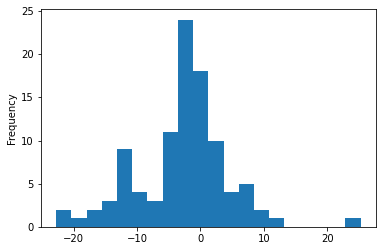

In [82]:
df.salt_response.plot(kind='hist', bins=20)

In [83]:
calc_mean_ci(df.salt_response)

(-2.7622999999999998, array([-4.22595335, -1.29864665]))

#### 6.57

In [84]:
df.loc[:, 'sugar_response'] = (df.msb2sug) - df.msb3sug

<AxesSubplot:ylabel='Frequency'>

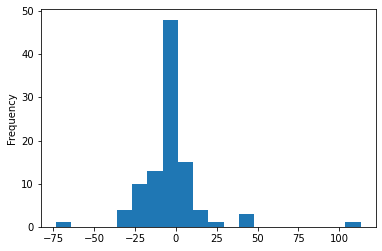

In [85]:
df.sugar_response.plot(kind='hist', bins=20)

In [86]:
calc_mean_ci(df.sugar_response)

(-3.1588000000000007, array([-6.91029193,  0.59269193]))

#### 6.58

<AxesSubplot:xlabel='sugar_response', ylabel='mn_sbp'>

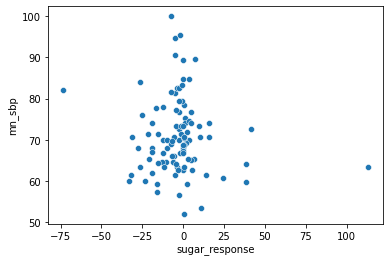

In [87]:
sns.scatterplot(data=df, y='mn_sbp', x='sugar_response')

<AxesSubplot:xlabel='salt_response', ylabel='mn_sbp'>

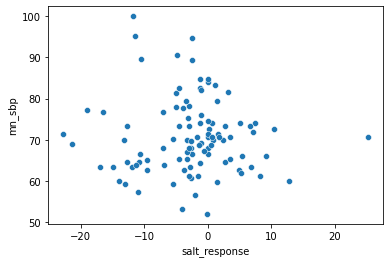

In [88]:
sns.scatterplot(data=df, y='mn_sbp', x='salt_response')

<AxesSubplot:xlabel='sugar_response', ylabel='mn_dbp'>

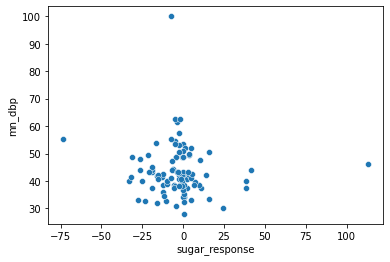

In [89]:
sns.scatterplot(data=df, y='mn_dbp', x='sugar_response')

<AxesSubplot:xlabel='salt_response', ylabel='mn_dbp'>

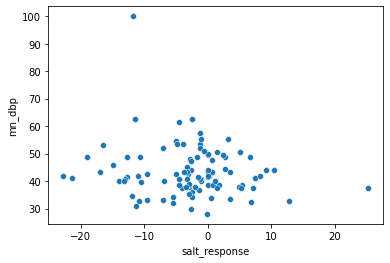

In [90]:
sns.scatterplot(data=df, y='mn_dbp', x='salt_response')

## Genetics

#### 6.59

In [91]:
df = pd.read_csv('data/SEXRAT.DAT.txt').clean_names()
df

,nm_chld,sx_1,sx_2,sx_3,sx_4,sx_5,sexchldn,num_fam
0,2,'M','M',NaN,NaN,NaN,'MM',4400
1,2,'M','F',NaN,NaN,NaN,'MF',4270
2,2,'F','M',NaN,NaN,NaN,'FM',4633
3,2,'F','F',NaN,NaN,NaN,'FF',4218
4,3,'M','M','M',NaN,NaN,'MMM',1651
5,3,'M','M','F',NaN,NaN,'MMF',1618
6,3,'M','F','M',NaN,NaN,'MFM',1507
7,3,'M','F','F',NaN,NaN,'MFF',1403
8,3,'F','M','M',NaN,NaN,'FMM',1551
9,3,'F','M','F',NaN,NaN,'FMF',1441


In [92]:
import itertools

In [93]:
groups = itertools.groupby('MMMF')
result = [sum(1 for _ in group)-1 for _, group in groups]
result

[2, 0]

In [94]:
def count_same(s):
    groups = itertools.groupby(s)
    result = [sum(1 for _ in group)-1 for _, group in groups]
    return sum(result)

In [95]:
df['same_sex'] = df.sexchldn.apply(count_same)
df.sample(4)

,nm_chld,sx_1,sx_2,sx_3,sx_4,sx_5,sexchldn,num_fam,same_sex
32,5,'M','M','F','M','M','MMFMM',524,2
17,4,'M','F','M','F',NaN,'MFMF',448,0
10,3,'F','F','M',NaN,NaN,'FFM',1610,1
35,5,'M','M','F','F','F','MMFFF',509,3


In [96]:
tot_child = ((df.nm_chld-1)*df.num_fam).sum()
tot_child

123445

In [97]:
same_birth = ((df.same_sex)*df.num_fam).sum()
same_birth

62548

In [98]:
binomial_ci_napp(tot_child, same_birth)

(0.5066871886265139, array([0.50389823, 0.50947615]))

## Nutrition

In [99]:
df = pd.read_csv('data/VALID.DAT.txt').clean_names().set_index('id')
df

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq
id,,,,,,,,
100396,33.20,21.2,81.15,53.8,8.26,1.68,1807,1242.2
100566,17.73,10.6,53.28,36.6,0.83,0.00,1418,907.0
107633,38.73,23.8,83.48,47.2,20.13,15.10,1889,786.0
107737,21.57,22.7,49.65,55.3,11.16,7.49,1426,1392.5
107744,21.35,30.4,55.18,71.0,7.18,12.84,1253,1259.8
...,...,...,...,...,...,...,...,...
136378,36.19,18.1,95.43,47.1,4.60,7.25,1976,1204.3
136407,22.42,10.9,62.15,32.0,2.56,1.81,1731,981.6
136421,16.98,20.4,42.85,47.5,13.91,8.64,1033,1128.3


#### 6.60

In [100]:
def estimate_bootstrap_mean(data, num_iter=1000, alpha=0.05):
    bootstrap = np.random.choice(data, size=(num_iter, len(data))).mean(axis=1)
    return bootstrap.mean(), np.quantile(bootstrap, [alpha/2, 1-alpha/2])

In [101]:
for c in [c for c in df.columns if c.endswith('dr')]:
    print(c)
    print(calc_mean_ci(df[c]))
    print(estimate_bootstrap_mean(df[c]))
    print('-'*10)

sfat_dr
(24.93173410404624, array([23.91537596, 25.94809225]))
(24.928344161849708, array([23.90686272, 25.9460289 ]))
----------
tfat_dr
(68.61537572254335, array([66.17062245, 71.06012899]))
(68.61691572254334, array([66.28003179, 71.09638584]))
----------
alco_dr
(8.962947976878612, array([ 7.51267239, 10.41322356]))
(8.963120115606937, array([ 7.63354624, 10.45014884]))
----------
cal_dr
(1619.8728323699422, array([1571.33871131, 1668.40695343]))
(1619.9919768786128, array([1576.07196532, 1667.52933526]))
----------


#### 6.61

Large sample is appropriate

#### 6.62

In [102]:
df['ca_tfat_dr'] = df['tfat_dr']*9/df['cal_dr']
df['ca_sfat_dr'] = df['sfat_dr']*9/df['cal_dr']

In [103]:
for c in ['ca_tfat_dr', 'ca_sfat_dr']:
    print(c)
    print(calc_mean_ci(df[c]))
    print(estimate_bootstrap_mean(df[c]))
    print('-'*10)

ca_tfat_dr
(0.3806626728271688, array([0.37435252, 0.38697283]))
(0.380832392785348, array([0.3750746 , 0.38649315]))
----------
ca_sfat_dr
(0.13803814065347492, array([0.13486413, 0.14121215]))
(0.13802174182412738, array([0.13518283, 0.14099177]))
----------


## Infectious Disease

In [104]:
df = pd.DataFrame({'time':range(11), 'num_pat':[2,6,9,33,49,66,52,37,18,11,4]})
df

,time,num_pat
0,0,2
1,1,6
2,2,9
3,3,33
4,4,49
5,5,66
6,6,52
7,7,37
8,8,18
9,9,11


#### 6.64

In [105]:
n = df.num_pat.sum()

In [106]:
m = (df.time*df.num_pat).sum()/n
m

5.2369337979094075

In [107]:
va = ((df.time-m)**2*df.num_pat).sum()/n
s = np.sqrt(va)
s

1.8943235411471062

In [108]:
calc_mean_ci2(m, s, n)

(5.2369337979094075, array([5.01684243, 5.45702517]))

In [109]:
calc_std_ci2(s, n)

(1.8943235411471062, array([1.7509884 , 2.06341561]))

#### 6.65

In [110]:
1-norm.cdf(7.5, m, s)

0.11611060441000243

In [111]:
k8 = df[df.time>=8].num_pat.sum()

#### 6.66

In [112]:
binomial_ci_napp(n, k8)

(0.11498257839721254, array([0.0780764 , 0.15188876]))

## Environmental Health

In [113]:
df = pd.read_csv('data/LEAD.DAT.txt').clean_names()
df

,id,area,ageyrs,sex,iqv_inf,iqv_comp,iqv_ar,iqv_ds,iqv_raw,iqp_pc,iqp_bd,iqp_oa,iqp_cod,iqp_raw,hh_index,iqv,iqp,iqf,iq_type,lead_grp,group,ld72,ld73,fst2yrs,totyrs,pica,colic,clumsi,irrit,convul,_2plat_r,_2plar_l,visrea_r,visrea_l,audrea_r,audrea_l,fwt_r,fwt_l,hyperact,maxfwt
0,101,3,11.08,1,3,4,3,5,15,10,8,8,5,31,77,61,85,70,1,1,1,25,18,2,11,2,2,2,2,2,16,16,36,38,27,25,72,52,99,72
1,102,3,9.42,1,7,9,7,6,29,8,7,10,9,34,77,82,90,85,1,1,1,31,28,2,6,2,2,2,2,2,17,16,23,19,18,28,61,48,0,61
2,103,3,11.08,1,4,9,5,3,21,10,7,7,20,44,30,70,107,86,1,1,1,30,29,2,5,2,2,2,2,2,16,17,20,24,16,17,46,49,99,49
3,104,2,6.92,1,4,6,6,6,22,5,8,5,13,31,77,72,85,76,1,1,1,29,30,2,5,2,2,2,1,2,11,9,34,42,35,30,48,41,2,48
4,105,1,11.25,1,5,4,8,5,22,5,10,13,12,40,62,72,100,84,1,1,1,2,34,1,11,2,2,2,1,2,17,16,26,34,31,33,51,42,99,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,603,1,5.58,2,5,9,10,10,34,8,8,10,9,35,58,91,92,91,2,3,2,45,29,2,5,2,2,2,2,2,99,99,99,99,99,99,99,99,1,99
120,604,2,4.58,1,7,10,6,12,35,9,11,6,14,40,77,92,100,92,2,3,2,41,34,2,3,1,1,2,2,2,99,99,99,99,99,99,99,99,1,99
121,605,2,5.17,2,6,7,7,8,28,8,0,8,10,26,58,81,77,77,2,3,2,51,30,2,5,2,1,2,1,2,8,6,64,56,61,63,42,27,1,42
122,606,3,3.83,1,12,9,18,8,47,12,10,13,10,45,70,111,108,111,2,3,2,42,32,2,3,2,2,2,2,2,99,99,99,99,99,99,99,99,0,99


#### 6.67

<AxesSubplot:xlabel='lead_grp', ylabel='iqv'>

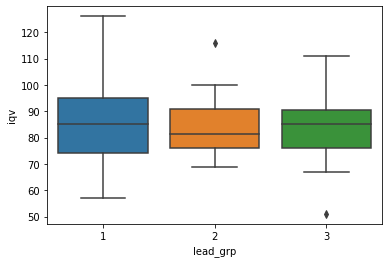

In [114]:
sns.boxplot(data=df, y='iqv', x='lead_grp')

In [115]:
df.groupby('lead_grp').iqv.apply(lambda x: pd.Series(calc_mean_ci(x)))

lead_grp   
1         0                                 85.141026
          1       [81.82982464914127, 88.45222663291]
2         0                                 84.333333
          1    [79.87900216165738, 88.78766450500927]
3         0                                 83.318182
          1    [77.63462912534598, 89.00173451101764]
Name: iqv, dtype: object

In [116]:
df.groupby('lead_grp').iqv.std()

lead_grp
1    14.686087
2    10.548714
3    12.818834
Name: iqv, dtype: float64

#### 6.68

<AxesSubplot:xlabel='lead_grp', ylabel='iqp'>

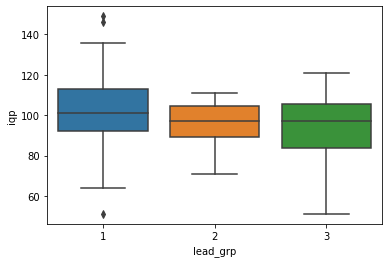

In [117]:
sns.boxplot(data=df, y='iqp', x='lead_grp')

In [118]:
df.groupby('lead_grp').iqp.apply(lambda x: pd.Series(calc_mean_ci(x)))

lead_grp   
1         0                                 102.705128
          1    [98.92030047441837, 106.48995593583804]
2         0                                  95.666667
          1    [90.87688166898407, 100.45645166434927]
3         0                                  94.136364
          1    [87.27403973200813, 100.99868754071915]
Name: iqp, dtype: object

In [119]:
df.groupby('lead_grp').iqp.std()

lead_grp
1    16.786752
2    11.343133
3    15.477466
Name: iqp, dtype: float64

#### 6.69

<AxesSubplot:xlabel='lead_grp', ylabel='iqf'>

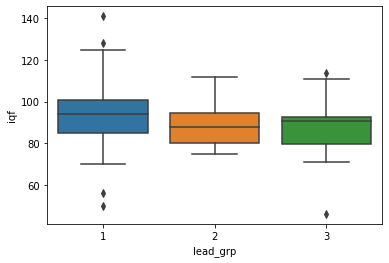

In [120]:
sns.boxplot(data=df, y='iqf', x='lead_grp')

In [121]:
df.groupby('lead_grp').iqf.apply(lambda x: pd.Series(calc_mean_ci(x)))

lead_grp   
1         0                                 92.884615
          1     [89.42496251844557, 96.3442682507852]
2         0                                     88.75
          1    [84.44689741977635, 93.05310258022364]
3         0                                 87.227273
          1    [80.89027639301659, 93.56426906152888]
Name: iqf, dtype: object

In [122]:
df.groupby('lead_grp').iqf.std()

lead_grp
1    15.344512
2    10.190575
3    14.292628
Name: iqf, dtype: float64

## Cardiology

In [123]:
nifed_df = pd.read_csv('data/NIFED.DAT.txt').clean_names().set_index('id')
nifed_df.trtgrp = nifed_df.trtgrp.str.strip("'")
nifed_df["id"] = nifed_df.index
nifed_df.sample(5)

,trtgrp,bashrtrt,lv1hrtrt,lv2hrtrt,lv3hrtrt,bassys,lv1sys,lv2sys,lv3sys,id
id,,,,,,,,,,
2,N,52,64,98,999,180,156,160,140,2
10,N,64,60,999,999,140,120,999,999,10
29,P,58,58,58,58,999,999,999,999,29
6,P,105,120,999,999,142,150,999,999,6
1,P,60,70,64,999,128,110,120,999,1


#### 6.70

In [124]:
nifed_df['diff1Hrtrt'] = nifed_df.bashrtrt-nifed_df.lv1hrtrt
nifed_df['diff1Sys'] = nifed_df.bassys-nifed_df.lv1sys

In [125]:
nifed_df.groupby('trtgrp').diff1Hrtrt.apply(lambda x: pd.Series(calc_mean_ci(x)))

trtgrp   
N       0                                     -6.111111
        1    [-11.414910195099942, -0.8073120271222791]
P       0                                        -2.875
        1      [-7.914706417744975, 2.1647064177449753]
Name: diff1Hrtrt, dtype: object

<AxesSubplot:xlabel='trtgrp', ylabel='diff1Hrtrt'>

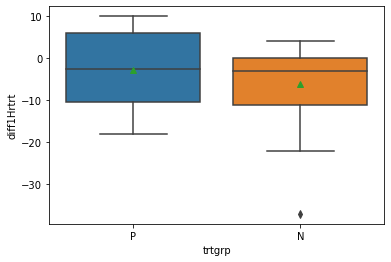

In [126]:
sns.boxplot(data=nifed_df, y='diff1Hrtrt', x='trtgrp', showmeans=True)

In [127]:
nifed_df.groupby('trtgrp').diff1Sys.apply(lambda x: pd.Series(calc_mean_ci(x)))

trtgrp   
N       0                                    7.944444
        1    [-1.3518854509904923, 17.24077433987938]
P       0                                       8.375
        1    [-5.373641266661805, 22.123641266661807]
Name: diff1Sys, dtype: object

<AxesSubplot:xlabel='trtgrp', ylabel='diff1Sys'>

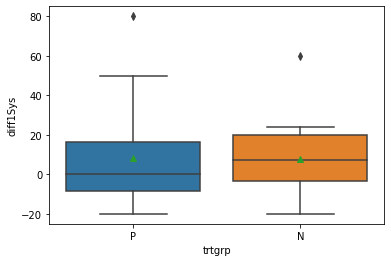

In [128]:
sns.boxplot(data=nifed_df, y='diff1Sys', x='trtgrp', showmeans=True)

#### 6.71

In [129]:
nifed_df['diff2Hrtrt'] = nifed_df.bashrtrt-nifed_df.lv2hrtrt
nifed_df['diff2Sys'] = nifed_df.bassys-nifed_df.lv2sys

In [130]:
nifed_df.groupby('trtgrp').diff2Hrtrt.apply(lambda x: pd.Series(calc_mean_ci(x)))

trtgrp   
N       0                                  -523.722222
        1     [-753.2291828258785, -294.2152616185659]
P       0                                    -285.6875
        1    [-516.1898094437754, -55.185190556224654]
Name: diff2Hrtrt, dtype: object

<AxesSubplot:xlabel='trtgrp', ylabel='diff2Hrtrt'>

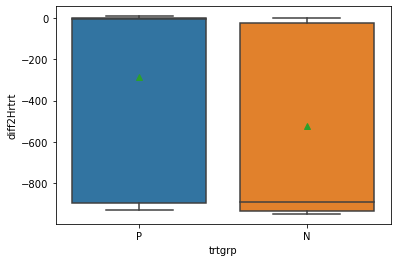

In [131]:
sns.boxplot(data=nifed_df, y='diff2Hrtrt', x='trtgrp', showmeans=True)

In [132]:
nifed_df.groupby('trtgrp').diff2Sys.apply(lambda x: pd.Series(calc_mean_ci(x)))

trtgrp   
N       0                                 -463.388889
        1    [-681.3537931186014, -245.4239846591765]
P       0                                   -252.3125
        1    [-468.8328516343705, -35.79214836562949]
Name: diff2Sys, dtype: object

<AxesSubplot:xlabel='trtgrp', ylabel='diff2Sys'>

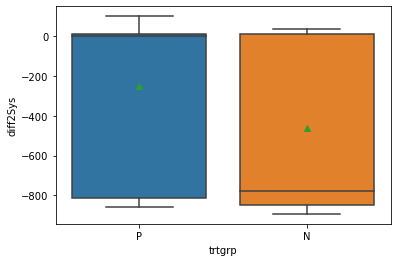

In [133]:
sns.boxplot(data=nifed_df, y='diff2Sys', x='trtgrp', showmeans=True)

#### 6.72

In [134]:
nifed_df['diff3Hrtrt'] = nifed_df.bashrtrt-nifed_df.lv3hrtrt
nifed_df['diff3Sys'] = nifed_df.bassys-nifed_df.lv3sys

In [135]:
nifed_df.groupby('trtgrp').diff3Hrtrt.apply(lambda x: pd.Series(calc_mean_ci(x)))

trtgrp   
N       0                                  -569.722222
        1      [-796.90399399791, -342.54045044653435]
P       0                                       -400.5
        1    [-649.6852008763512, -151.31479912364873]
Name: diff3Hrtrt, dtype: object

<AxesSubplot:xlabel='trtgrp', ylabel='diff3Hrtrt'>

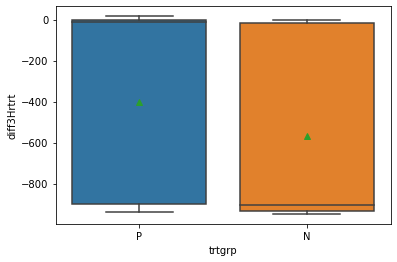

In [136]:
sns.boxplot(data=nifed_df, y='diff3Hrtrt', x='trtgrp', showmeans=True)

In [137]:
nifed_df.groupby('trtgrp').diff3Sys.apply(lambda x: pd.Series(calc_mean_ci(x)))

trtgrp   
N       0                                  -463.833333
        1    [-679.0909746738008, -248.57569199286587]
P       0                                    -364.6875
        1     [-595.441870652797, -133.93312934720308]
Name: diff3Sys, dtype: object

<AxesSubplot:xlabel='trtgrp', ylabel='diff3Sys'>

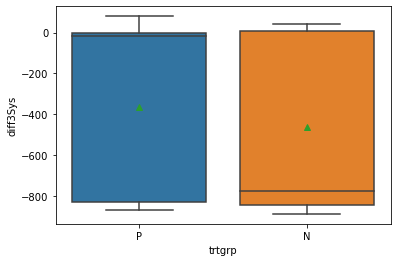

In [138]:
sns.boxplot(data=nifed_df, y='diff3Sys', x='trtgrp', showmeans=True)

#### 6.73

In [139]:
nifed_df['lastHrtrt'] = nifed_df.loc[:,'lv1hrtrt':'lv3hrtrt'].ffill(axis=1).iloc[:, -1]
nifed_df['lastSys'] = nifed_df.loc[:,'lv1sys':'lv3sys'].ffill(axis=1).iloc[:, -1]

In [140]:
nifed_df['diffLastHrtrt'] = nifed_df.bashrtrt-nifed_df.lastHrtrt
nifed_df['diffLastSys'] = nifed_df.bassys-nifed_df.lastSys

In [141]:
nifed_df.groupby('trtgrp').lastHrtrt.apply(lambda x: pd.Series(calc_mean_ci(x)))

trtgrp   
N       0                                 641.444444
        1     [412.0090278098535, 870.8798610790353]
P       0                                   477.3125
        1    [224.05137555311777, 730.5736244468823]
Name: lastHrtrt, dtype: object

<AxesSubplot:xlabel='trtgrp', ylabel='lastHrtrt'>

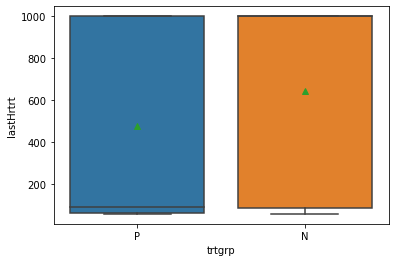

In [142]:
sns.boxplot(data=nifed_df, y='lastHrtrt', x='trtgrp', showmeans=True)

In [143]:
nifed_df.groupby('trtgrp').diffLastSys.apply(lambda x: pd.Series(calc_mean_ci(x)))

trtgrp   
N       0                                  -463.833333
        1    [-679.0909746738008, -248.57569199286587]
P       0                                    -364.6875
        1     [-595.441870652797, -133.93312934720308]
Name: diffLastSys, dtype: object

<AxesSubplot:xlabel='trtgrp', ylabel='diffLastSys'>

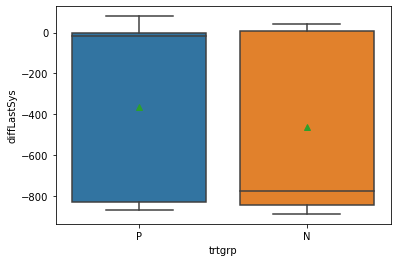

In [144]:
sns.boxplot(data=nifed_df, y='diffLastSys', x='trtgrp', showmeans=True)

#### 6.74

?

## Occupational Health

#### 6.75

In [145]:
n_death = 6
n_deaths_expected = 1.8

In [146]:
calc_possion_ci(n_death, 0.05)

(6, array([ 2.20187988, 13.05944824]))

Yes, observed number in tire workers is excessive because 95% CI do not include expected rate.

#### 6.76

In [147]:
n_death = 4
n_deaths_expected = 2.5

In [148]:
calc_possion_ci(n_death)

(4, array([ 1.08984375, 10.24160156]))

No, observed number in tre workers is excessive because 95% CI include expected rate.

## Cancer

In [149]:
n = 1996
n_fpr = 156

#### 6.77

It means that mammogram resulted in having cancer whereas woman was healthy.

#### 6.78

In [150]:
binomial_ci_napp(n, n_fpr)

(0.0781563126252505, array([0.06638084, 0.08993179]))

#### 6.79

In [151]:
p_fpr = n_fpr/n
p0fpr = binom.pmf(0, 5, p_fpr)
p0fpr

0.6657120686070561

#### 6.80

In [152]:
p0fpr = binom.pmf(0, 5, 0.08993179)
p0fpr

0.6242660550677939

In [153]:
p0fpr = binom.pmf(0, 5, 0.06638084)
p0fpr

0.7093307369126577

## Nutrition

In [154]:
df = pd.read_csv('data/VALID.DAT.txt').clean_names().set_index('id')
df['lnalc'] = np.log1p(df.alco_dr)
df

,sfat_dr,sfat_ffq,tfat_dr,tfat_ffq,alco_dr,alco_ffq,cal_dr,cal_ffq,lnalc
id,,,,,,,,,
100396,33.20,21.2,81.15,53.8,8.26,1.68,1807,1242.2,2.225704
100566,17.73,10.6,53.28,36.6,0.83,0.00,1418,907.0,0.604316
107633,38.73,23.8,83.48,47.2,20.13,15.10,1889,786.0,3.050694
107737,21.57,22.7,49.65,55.3,11.16,7.49,1426,1392.5,2.498152
107744,21.35,30.4,55.18,71.0,7.18,12.84,1253,1259.8,2.101692
...,...,...,...,...,...,...,...,...,...
136378,36.19,18.1,95.43,47.1,4.60,7.25,1976,1204.3,1.722767
136407,22.42,10.9,62.15,32.0,2.56,1.81,1731,981.6,1.269761
136421,16.98,20.4,42.85,47.5,13.91,8.64,1033,1128.3,2.702032


In [155]:
overall_mean = df.lnalc.mean()
overall_mean

1.7973380337467724

In [156]:
n_bootstrap = 1000
sample_size = 5
samples = np.random.choice(df.lnalc, size=(n_bootstrap, sample_size))

In [157]:
samples_mean = samples.mean(axis=1)
samples_std = samples.std(axis=1, ddof=1)
samples_tstat = (samples_mean-overall_mean)/(samples_std/np.sqrt(5))

#### 6.81

normal

#### 6.82

In [158]:
exp_perc = norm.cdf(-2.776)*2
exp_perc

0.00550322084614124

#### 6.83

In [159]:
(np.abs(samples_tstat) > 2.776).mean()

0.068

## Cardiovascular Disease

In [160]:
within_std = 7.8
s_size = 2
s_mean = 200

#### 6.84

In [161]:
def calc_mean_ci_known_std(m, s, n, alpha=0.05):
    zstat = norm.ppf([alpha/2, 1-alpha/2])
    ci_zstat = zstat*s/np.sqrt(n)
    return m, m+ci_zstat

In [162]:
calc_mean_ci_known_std(s_mean, within_std, s_size, 0.1)

(200, array([190.9279202, 209.0720798]))

#### 6.85

In [163]:
250-norm.ppf([0.9])[0]*within_std/np.sqrt(s_size)

242.9316883409928

## Endocrinology 

In [164]:
bone_df = pd.read_csv('data/BONEDEN.DAT.txt').clean_names()
bone_df.sample(5)

,id,age,zyg,ht1,wt1,tea1,cof1,alc1,cur1,men1,pyr1,ls1,fn1,fs1,ht2,wt2,tea2,cof2,alc2,cur2,men2,pyr2,ls2,fn2,fs2
0,1002501,27,2,162,57,35,0,1,1,0,0.0,0.81,0.72,1.00,160,56,42,21,0,0,0,13.75,0.76,0.68,1.04
22,1536701,34,2,162,60,0,49,0,0,2,0.0,0.62,0.61,1.23,170,72,0,21,0,0,0,12.00,0.65,0.81,1.33
17,1505502,49,1,164,70,0,28,0,1,2,0.0,0.83,0.66,1.01,165,67,14,28,9,7,0,32.00,0.79,0.63,1.15
32,1637901,47,1,157,65,14,7,2,2,2,0.0,0.80,0.67,1.22,165,62,0,28,14,13,0,6.00,0.75,0.63,1.12
9,1269402,43,2,165,58,7,21,6,0,1,0.0,1.01,0.90,1.30,168,62,0,35,35,30,2,39.00,0.89,0.87,1.24


#### 6.86

In [165]:
femoral_diff = bone_df.fn2-bone_df.fn1
calc_mean_ci(femoral_diff)

(-0.0007317073170731633, array([-0.03012505,  0.02866164]))

#### 6.87

In [166]:
femoral_shaft = bone_df.fs2-bone_df.fs1
calc_mean_ci(femoral_shaft)

(-0.030487804878048776, array([-0.06670351,  0.0057279 ]))

## Simulation

#### 6.88

In [167]:
n = 10
p = .6
size = 200

In [168]:
ran_sam = binom.rvs(n, p, size=size)

<AxesSubplot:ylabel='Count'>

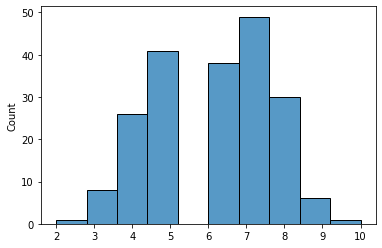

In [169]:
sns.histplot(ran_sam, bins=n)

In [170]:
samples_ci = [binomial_ci_napp(n, t, .1)[1] for t in ran_sam]

Normal approximation should not be used
2.1000000000000005
Normal approximation should not be used
2.1000000000000005
Normal approximation should not be used
0.8999999999999998
Normal approximation should not be used
2.1000000000000005
Normal approximation should not be used
2.1000000000000005
Normal approximation should not be used
2.4000000000000004
Normal approximation should not be used
2.1000000000000005
Normal approximation should not be used
2.1000000000000005
Normal approximation should not be used
2.4000000000000004
Normal approximation should not be used
2.5
Normal approximation should not be used
2.4
Normal approximation should not be used
2.1000000000000005
Normal approximation should not be used
2.4
Normal approximation should not be used
2.5
Normal approximation should not be used
2.1000000000000005
Normal approximation should not be used
2.1000000000000005
Normal approximation should not be used
2.4000000000000004
Normal approximation should not be used
2.5
Normal approx

#### 6.89

In [171]:
inc_ci = sum(ci[0] <= p <= ci[1] for ci in samples_ci)

In [172]:
inc_ci/size

0.92

#### 6.90

No

#### 6.91

In [173]:
n = 20
p = .6
size = 200

In [174]:
ran_sam = binom.rvs(n, p, size=size)

<AxesSubplot:ylabel='Count'>

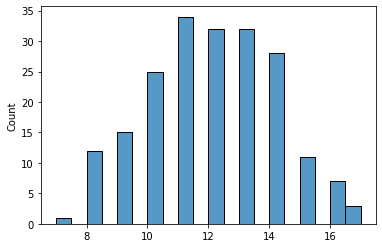

In [175]:
sns.histplot(ran_sam, bins=n)

In [176]:
samples_ci = [binomial_ci_napp(n, t, .1)[1] for t in ran_sam]

Normal approximation should not be used
4.949999999999999
Normal approximation should not be used
4.800000000000001
Normal approximation should not be used
4.200000000000001
Normal approximation should not be used
4.95
Normal approximation should not be used
4.55
Normal approximation should not be used
4.200000000000001
Normal approximation should not be used
4.200000000000001
Normal approximation should not be used
4.8
Normal approximation should not be used
4.95
Normal approximation should not be used
4.200000000000001
Normal approximation should not be used
4.949999999999999
Normal approximation should not be used
3.75
Normal approximation should not be used
4.949999999999999
Normal approximation should not be used
2.5500000000000003
Normal approximation should not be used
4.55
Normal approximation should not be used
4.55
Normal approximation should not be used
4.949999999999999
Normal approximation should not be used
4.200000000000001
Normal approximation should not be used
4.55
No

#### 6.92

In [177]:
inc_ci = sum(ci[0] <= p <= ci[1] for ci in samples_ci)

In [178]:
inc_ci/size

0.885

#### 6.93

Questionable

#### 6.94

In [179]:
n = 50
p = .6
size = 200

In [180]:
ran_sam = binom.rvs(n, p, size=size)

<AxesSubplot:ylabel='Count'>

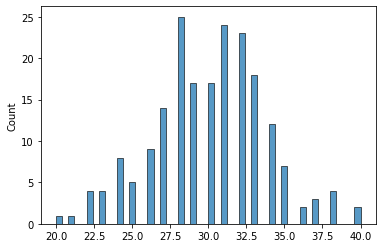

In [181]:
sns.histplot(ran_sam, bins=n)

In [182]:
samples_ci = [binomial_ci_napp(n, t, .1)[1] for t in ran_sam]

#### 6.92

In [183]:
inc_ci = sum(ci[0] <= p <= ci[1] for ci in samples_ci)

In [184]:
inc_ci/size

0.855

#### 6.93

Yes

## Hypertension

In [185]:
hyp_df = pd.DataFrame({
    'sbp':[121, 109, 117.5, 125, 125, 129, 123, 118.5, 123.5, 127],
    'dbp':[87.5, 81, 91.5, 94, 87.5, 90.5, 90, 85.5, 87.5, 89]
})
hyp_df

,sbp,dbp
0,121.0,87.5
1,109.0,81.0
2,117.5,91.5
3,125.0,94.0
4,125.0,87.5
5,129.0,90.5
6,123.0,90.0
7,118.5,85.5
8,123.5,87.5
9,127.0,89.0


#### 6.97

In [186]:
calc_mean_ci(hyp_df.sbp)

(121.85, array([117.73695699, 125.96304301]))

#### 6.98

True mean is below 140

#### 6.99

In [187]:
hyper_stat = (hyp_df.sbp >=140) | (hyp_df.dbp >= 90)
hyper_stat

0    False
1    False
2     True
3     True
4    False
5     True
6     True
7    False
8    False
9    False
dtype: bool

In [188]:
p_hyper = hyper_stat.sum()/hyp_df.shape[0]

#### 6.100

In [189]:
binomial_ci_napp(hyp_df.shape[0], hyper_stat.sum())

Normal approximation should not be used
2.4


(0.4, array([0.09636369, 0.70363631]))

#### 6.101

Yes

## Sports medicine

#### 6.103

#### 6.104

In [190]:
p_true = 

SyntaxError: invalid syntax (<ipython-input-190-915d3a4631ce>, line 1)

## Hypertension

#### 6.104

In [ ]:
dbp = [89, 88, 81, 84, 82, 89.5]

In [ ]:
calc_mean_ci(pd.Series(dbp))

The true dbp is less then 90 

#### 6.105

In [ ]:
true_mean = np.mean(dbp)
true_sd = np.std(dbp, ddof=1)
true_mean, true_sd

In [ ]:
1-norm.cdf(90, true_mean, true_sd)

#### 6.106

In [ ]:
m = 50
s = 10
n = 13

In [ ]:
def perc_of_mean(m, s, n=13, d=1):
    se = s/np.sqrt(n)
    return norm.cdf(m+d, m, se)-norm.cdf(m-d, m, se)

In [ ]:
perc_of_mean(m, s, 13, 1)

#### 6.107

In [ ]:
while perc_of_mean(m, s, n, 1) < .99:
    n += 1
n

## Radiology, Cancer

#### 6.108

In [ ]:
fp = 0
tp = 46
fn = 1
tn = 17

In [ ]:
sens = tp/(tp+fn)
sens

#### 6.109

## Genetics

#### 6.110

p**2

#### 6.111

In [ ]:
n = 10_000
k = 11

In [ ]:
p, p_ci = binomial_ci_napp(n,k)
p, p_ci

#### 6.112

In [ ]:
np.sqrt(p), np.sqrt(p_ci)

#### 6.113

In [ ]:
n = 10_000
k = 10
p, p_ci = binomial_ci_napp(n,k)
p, p_ci

#### 6.114

No

#### 6.115

(iv) because largest n

#### 6.116

In [194]:
n_cancer = 30
k_peryears = 35_000
lam, lam_ci = calc_possion_ci(30)
lam_ci/k_peryears*10**5

array([ 57.83098493, 122.36258371])